Step 1

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
def createRandomGraph(num_nodes, num_edges):
    #create an empty graph
    G = nx.Graph()

    #add nodes to the graph
    G.add_nodes_from(range(num_nodes))

    #generate random edges until reaching the desired number of edges
    edges_added = 0
    while edges_added < num_edges:
        #pick two random nodes
        node1 = random.randint(0, num_nodes - 1)
        node2 = random.randint(0, num_nodes - 1)
        #if not the same node and there is no edge between them
        if node1 != node2 and not G.has_edge(node1, node2):
            #add edge
            G.add_edge(node1, node2)
            edges_added += 1

    return G

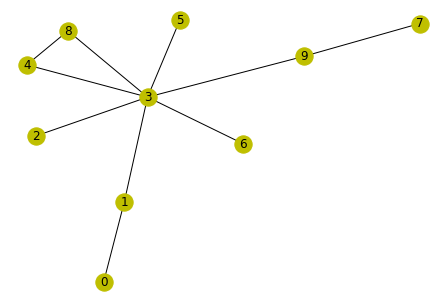

In [3]:
#example:
num_nodes = 10
num_edges = 10
test_graph = createRandomGraph(num_nodes, num_edges)

#display
nx.draw(test_graph, with_labels=True,node_color='y')
plt.show()

In [4]:
def assignColours(graph, num_colours):
    #dictionary where nodes are keys and colours are values
    colour_map = {}
    colours = list(range(num_colours))
    #assign a random colour from the list to each node
    for node in graph.nodes():
        colour_map[node] = random.choice(colours)
        
    return colour_map

In [5]:
#example:
colour_map = assignColours(test_graph, 4)
colour_map

{0: 3, 1: 2, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1, 8: 1, 9: 3}

In [6]:
def countConflicts(graph, colour_map):
    conflicts = 0
    #for each edge in graph
    for edge in graph.edges():
        #if nodes at either end of the edge are equal
        if colour_map[edge[0]] == colour_map[edge[1]]:
            #add to conflict count
            conflicts += 1
    return conflicts

In [7]:
def localSearch(graph, initial_colour_map):
    """
    Perform local search to improve the quality of the colouring.

    Parameters:
        graph (nx.Graph): Input graph.
        initial_colour_map (dict): Initial colouring.

    Returns:
        dict: Improved colouring.
    """
    #save number of colours
    colours = set(initial_colour_map.values())
    
    #copy first colour map
    colour_map = initial_colour_map.copy()
    #initialise "best" version of colour map
    best_colour_map = initial_colour_map.copy()
    
    #initialise "best" number of conflicts
    best_conflicts = countConflicts(graph, initial_colour_map)

    max_iterations = 100
    #repeat max iterations times
    for i in range(max_iterations):
        #choose a random node
        node = random.choice(list(graph.nodes()))
        #save its colour
        current_colour = colour_map[node]
        #find all the neighbouring colours
        current_neighbours_colours = {colour_map[neighbour] for neighbour in graph.neighbors(node)}
        #available colours are colours that arent neighbouring node
        available_colours = colours - current_neighbours_colours
        #if there are available colours
        if available_colours:
            #set node as a random choice of available colours
            new_colour = random.choice(list(available_colours))
            colour_map[node] = new_colour
        #if there are no available colours then keep current colour
        conflicts = countConflicts(graph, colour_map)
        #if there are less conflicts this iteration
        if conflicts < best_conflicts:
            #update "best" version to current version
            best_colour_map = colour_map.copy()
            #update conflicts
            best_conflicts = conflicts
            #break if no conflicts as we have found valid colouring
            if conflicts == 0:
                break
    return best_colour_map

In [8]:
#showing local_search improves conflicts even if small number of colours available
initial_colour_map = assignColours(test_graph, 5)
improved_colour_map = localSearch(test_graph, initial_colour_map)

print("Initial colouring conflicts:", countConflicts(test_graph, initial_colour_map))
print("Improved colouring conflicts:", countConflicts(test_graph, improved_colour_map))

Initial colouring conflicts: 3
Improved colouring conflicts: 0


In [9]:
def chromaticNumber(graph, assigning_func):
    #iterate through different number of colours and when there is 0 conflicts, 
    #return the number of colours
    for i in list(range(1,10)):
        initial_colour_map = assigning_func(graph, i)
        improved_colour_map = localSearch(graph, initial_colour_map)
        conflicts =  countConflicts(graph, improved_colour_map)
        if conflicts == 0:
            return i

In [10]:
def averageChromNum(nodes, edges, assigning_func):
    #create 10 random graphs
    random_graphs = [createRandomGraph(nodes, edges) for i in range(10)]
    chrom_nums = []

    #calculate chromatic number for each and append to list
    for i in random_graphs:
        chrom_nums.append(chromaticNumber(i, assigning_func))

    #calculate average
    average_c_num = round(sum(chrom_nums)/10)
    print("Using the", assigning_func.__name__, "function to assign colours.")
    print("Average chromatic number for 10 random graphs with {0} nodes and {1} edges is {2}".format(nodes, edges, average_c_num))

In [11]:
#testing to see chromatic numbers of less connceted graphs
nodes = 20
edges = 10

averageChromNum(nodes, edges, assignColours)

Using the assignColours function to assign colours.
Average chromatic number for 10 random graphs with 20 nodes and 10 edges is 2


In [12]:
#testing to see chromatic numbers of more connected graphs
nodes = 20
edges = 40

averageChromNum(nodes, edges, assignColours)

Using the assignColours function to assign colours.
Average chromatic number for 10 random graphs with 20 nodes and 40 edges is 4


Step 2

In [13]:
def assignColoursDegree(graph, num_colours):
    colour_map = {}
    #sort nodes by degree in descending order
    nodes_sorted_by_degree = sorted(graph.nodes(), key=lambda x: graph.degree(x), reverse=True)
    #iterate through sorted nodes
    for node in nodes_sorted_by_degree:
        #find neighbours
        neighbors_colours = {colour_map[neighbor] for neighbor in graph.neighbors(node) if neighbor in colour_map}
        #find available colours
        available_colours = set(range(num_colours)) - neighbors_colours
        #if there are available colours
        if available_colours:
            #colour with "lowest" colour
            colour_map[node] = min(available_colours)
        else:
            #choose random colour
            colour_map[node] = random.choice(list(range(num_colours)))
    return colour_map

In [14]:
#showing local_search improves conflicts even if small number of colours available
initial_colour_map = assignColoursDegree(test_graph, 5)
improved_colour_map = localSearch(test_graph, initial_colour_map)

print("Initial colouring conflicts:", countConflicts(test_graph, initial_colour_map))
print("Improved colouring conflicts:", countConflicts(test_graph, improved_colour_map))

Initial colouring conflicts: 0
Improved colouring conflicts: 0


In [15]:
#testing to see chromatic numbers of less connected graphs
nodes = 20
edges = 10

averageChromNum(nodes, edges, assignColoursDegree)

Using the assignColoursDegree function to assign colours.
Average chromatic number for 10 random graphs with 20 nodes and 10 edges is 2


In [16]:
#testing to see chromatic numbers of more connected graphs
nodes = 20
edges = 40

averageChromNum(nodes, edges, assignColoursDegree)

Using the assignColoursDegree function to assign colours.
Average chromatic number for 10 random graphs with 20 nodes and 40 edges is 4
